# Machine Learning 2021/2022 Project
# Giovanni Pica 1816394
## 1 Introduction
This project is based on predicting the price of a specific model of used Bmw car. I take the dataset on Kaggle. 

## 2 Load and clean dataset
This paragraph is dedicated for the loading and cleaning (if it is required) of the dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# load dataset
import pandas as pd
import numpy as np

df = pd.read_csv('bmw.csv')
print(df.shape)
df.head()

(10781, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [2]:
# check for NaN values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

So I don't need to clean the dataset

## 3 Data analysis
In this paragraph I illustrate some features of the data and some plots. I decide to use seaborn library for those plots.

<AxesSubplot:xlabel='transmission', ylabel='count'>

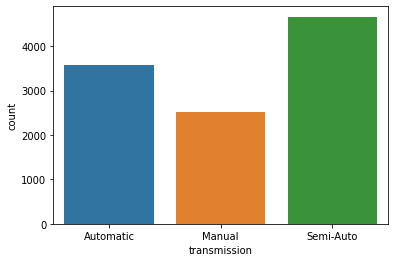

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# transmission plot
sns.countplot(df["transmission"])

<AxesSubplot:xlabel='fuelType', ylabel='count'>

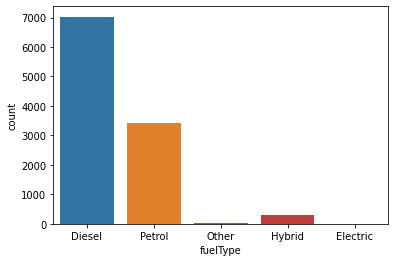

In [20]:
# fuel type plot
sns.countplot(df['fuelType'])

<AxesSubplot:xlabel='count', ylabel='year'>

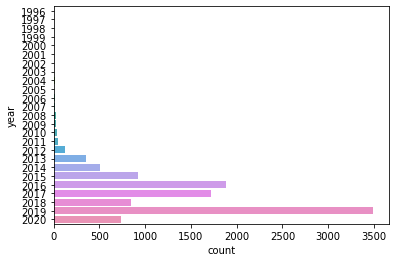

In [18]:
# year plot
sns.countplot(y = df['year'])

Some plots based on the prices.

<AxesSubplot:xlabel='year', ylabel='price'>

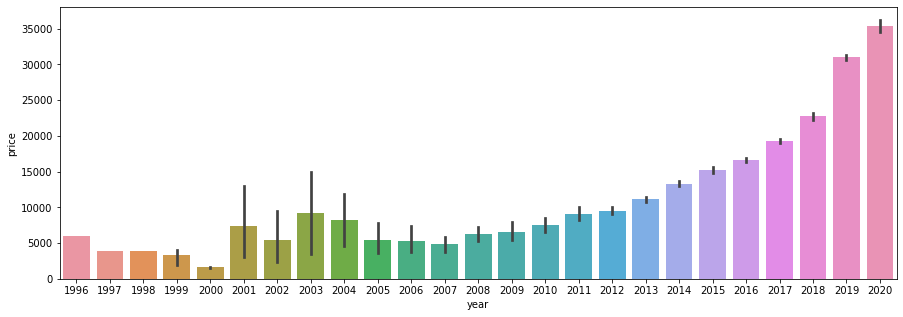

In [16]:
fig = plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"])

A plot that illustrates the distribution of the target feature.

(array([ 846., 3554., 3148., 1805.,  690.,  313.,  197.,   97.,   70.,
          29.]),
 array([ 3000., 10700., 18400., 26100., 33800., 41500., 49200., 56900.,
        64600., 72300., 80000.]),
 <BarContainer object of 10 artists>)

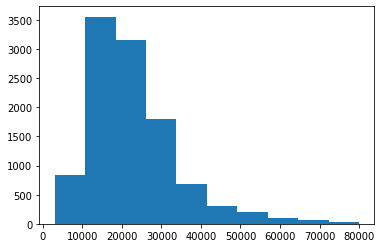

In [14]:
plt.hist(df['price'], bins=10, range=(3000, 80000))

## 3 Preprocessing
In this paragraph I show some preprocessing that I do on the data.

In [22]:
# OneHotEncoding on model name using get_dummies of pandas library
df_encoded = pd.get_dummies(df)
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
from sklearn import preprocessing

# scaling data
df_encoded_scaled = pd.DataFrame(preprocessing.scale(df_encoded), columns=df_encoded.columns)
print(df_encoded.shape)
df_encoded_scaled.head()

(10781, 38)


,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-1.310782,-1.010373,1.653447,-0.108963,0.038326,-0.303911,-0.472700,-0.358698,-0.541291,-0.318867,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
1,0.392121,0.373771,-0.424388,0.216199,-0.433982,-0.303911,-0.472700,-0.358698,-0.541291,-0.318867,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,-1.368163,-0.016684,-0.168603,-0.057883,1.468028
2,-0.459331,-0.589874,1.483453,0.460070,-0.159533,1.507591,-0.472700,-0.358698,-0.541291,-0.318867,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
3,-0.033605,-0.874587,0.046894,0.216199,0.510634,-1.209662,2.115507,-0.358698,-0.541291,-0.318867,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
4,-1.310782,-0.721280,0.559104,0.460070,-0.191445,1.507591,-0.472700,-0.358698,-0.541291,-0.318867,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186


I also perform feature importance with a RandomForestRegressor according to permutation importance.

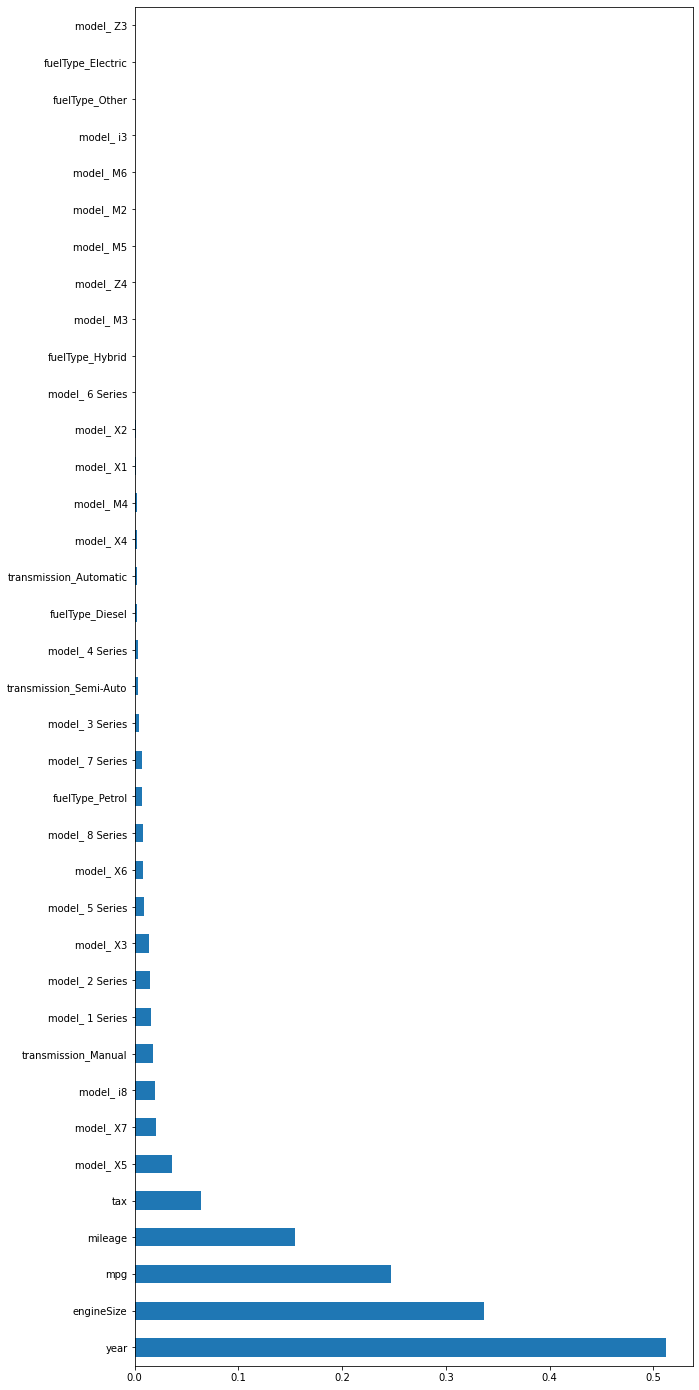

In [25]:
X = df_encoded_scaled.drop(columns=['price'])
y = df_encoded_scaled[['price']]

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# define the model
model = RandomForestRegressor(n_estimators=50,n_jobs=-1, oob_score=True)
# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, random_state=0, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# Plot
# plot feature importance
pd.Series(importance, index=X.columns).nlargest(len(importance)).plot(figsize=(10,25),kind='barh')
plt.show()

Now I split the dataset in train and testing set, I decide to give 33% to test set and 67% to train set.

In [26]:
from sklearn.model_selection import train_test_split

# splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7223, 37)
(3558, 37)
(7223, 1)
(3558, 1)


## 4 Modeling
For the choice of the model I have considered:
- Linear Regressor;
- Support Vector Regressor;
- Decision Tree Regressor;
- Random Forest Regressor;
- MLPRegressor.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import svm, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# LR
lr = LinearRegression()

# SVM
svr = svm.SVR()

# DTR
dtr = tree.DecisionTreeRegressor()

# RFR
rfr = RandomForestRegressor()

# MLPR
mlpr = MLPRegressor()

I also perform HyperParameter tuning on SVR, DTR, RFR, MLPR based on MSE.

In [28]:
# HyperParameter tuning on SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': [1, 25,50, 100],
    'gamma': [1e-3, 1e-5, 1e-7, 0.1],
    'kernel': ['rbf']}]
search = GridSearchCV(svr, tuned_parameters, scoring='neg_mean_absolute_error', n_jobs=-1)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.158332422174087
Best Hyperparameters: {'C': 25, 'gamma': 0.1, 'kernel': 'rbf'}


In [29]:
# HyperParameter tuning on DTR
tuned_parameters = [{"splitter":["best","random"],
            "max_depth" : [1, 20, 50,100],
           "min_samples_leaf":[1,5,20,50]}]
search = GridSearchCV(dtr, tuned_parameters, scoring='neg_mean_absolute_error', n_jobs=-1)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.17669011053432637
Best Hyperparameters: {'max_depth': 100, 'min_samples_leaf': 5, 'splitter': 'best'}


In [30]:
# HyperParameter tuning on RFR
tuned_parameters = [{'max_depth': [5, 10, 50, 100],
    'min_samples_leaf': [5, 10, 50],
    'n_estimators': [10, 100 ,500]}]
search = GridSearchCV(rfr, tuned_parameters, scoring='neg_mean_absolute_error', n_jobs=-1)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.1603340096626921
Best Hyperparameters: {'max_depth': 100, 'min_samples_leaf': 5, 'n_estimators': 500}


In [33]:
# HyperParameter tuning on MLPR
tuned_parameters = [{'hidden_layer_sizes': [(10, 10, 10), (50,50,50), (50, 100, 50)],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [1e-3,1e-5, 1e-7, 0.1],}]
search = GridSearchCV(mlpr, tuned_parameters, scoring='neg_mean_absolute_error', n_jobs=-1)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.15246707622547537
Best Hyperparameters: {'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'lbfgs'}


Now I have all the models tuned and I can compare them.

In [46]:
# function that return a regressor and its R^2 score.
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    return regressor, score

model_performance = {}

models_to_evaluate = [LinearRegression(), svm.SVR(C=25, gamma=0.1, kernel='rbf'), tree.DecisionTreeRegressor(max_depth=20, 
min_samples_leaf=5, splitter='best'), RandomForestRegressor(n_jobs = -1,max_depth=100, min_samples_leaf=5, n_estimators=500), 
MLPRegressor(alpha=0.1, hidden_layer_sizes=(50,100,50), solver='lbfgs')]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance[model] = score
print(model_performance)

{LinearRegression(): 0.8456353481382997, SVR(C=25, gamma=0.1): 0.91203789426966, DecisionTreeRegressor(max_depth=20, min_samples_leaf=5): 0.9022636219121302, RandomForestRegressor(max_depth=100, min_samples_leaf=5, n_estimators=500,
                      n_jobs=-1): 0.9115913987283445, MLPRegressor(alpha=0.1, hidden_layer_sizes=(50, 100, 50), solver='lbfgs'): 0.9193498202449732}


In the comparison I found that MLPRegressor is the best model for our purpose.